# Class 14 - A Classification Pipeline

## The Basics

In [176]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [177]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn

In [178]:
a = sn.load_dataset('iris')

In [ ]:
a.head()

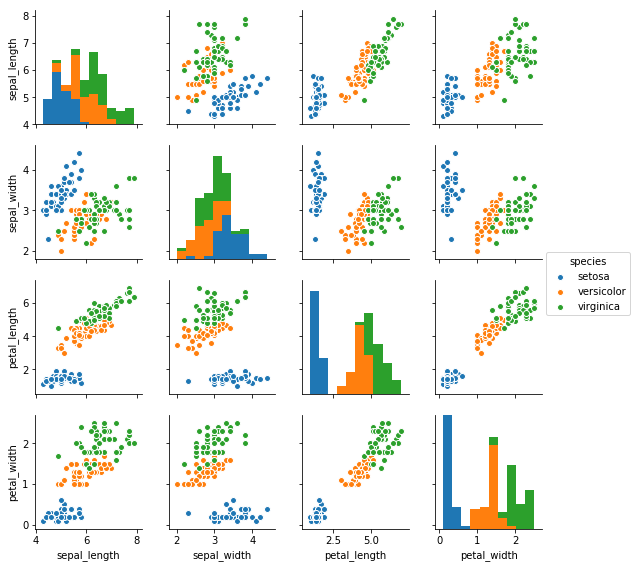

In [179]:
sn.pairplot(a, hue='species', size=2)

In [ ]:
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier

In [184]:
X = a.drop(['petal_length','sepal_width','species'], axis=1)

In [185]:
import sklearn.preprocessing as pp
le = pp.LabelEncoder()
y = le.fit_transform(a['species'].astype(str))

In [186]:
np.unique(y)
a['species'].unique()

array([0, 1, 2])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [187]:
dtc = DecisionTreeClassifier(max_depth=2).fit(X,y)

In [188]:
# This code is a simplified version of https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/helpers_05_08.py
def visualize_classifier(model, X, y):
    ax = plt.gca()
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y)
    
    model.fit(X, y)
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    def plot_boundaries(i, xlim, ylim):
    
        if i >= 0:
            tree = model.tree_

            if tree.feature[i] == 0:
                ax.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k', zorder=2)
                plot_boundaries(tree.children_left[i],[xlim[0], tree.threshold[i]], ylim)
                plot_boundaries(tree.children_right[i],[tree.threshold[i], xlim[1]], ylim)

            elif tree.feature[i] == 1:
                ax.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k', zorder=2)
                plot_boundaries(tree.children_left[i], xlim,[ylim[0], tree.threshold[i]])
                plot_boundaries(tree.children_right[i], xlim,[tree.threshold[i], ylim[1]])
            
    plot_boundaries(0, xlim,ylim)

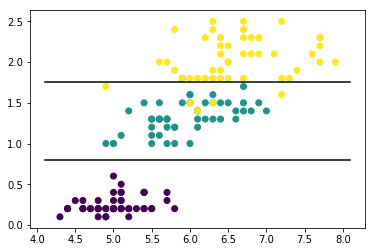

In [190]:
visualize_classifier(dtc, X, y)

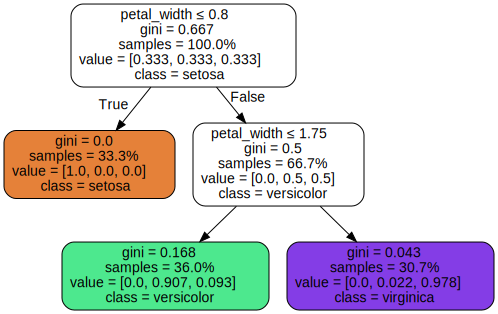

In [191]:
import graphviz
dot_data = sk.tree.export_graphviz(dtc, out_file=None, 
                         feature_names=list(X.columns), 
                         class_names = [i for i in a['species'].unique()],
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph  

In [192]:
from sklearn.ensemble import RandomForestClassifier

In [193]:
rnc = RandomForestClassifier(n_estimators=100)

In [198]:
# This code is a simplified version of https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.08-Random-Forests.ipynb

def visualize_rf(model, X, y):
    ax = plt.gca()
    
    # Plot the training points
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=30, zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

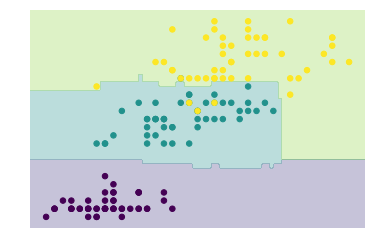

In [199]:
visualize_rf(rnc,X,y)

# Let's try this together

## The manual approach

In [328]:
raw = pd.read_csv('https://raw.githubusercontent.com/mschermann/msis2802winter2018classes/master/adult.csv')

In [ ]:
raw.head()

Check [here](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html) for interpretation of measures:
>* The precision is the ratio `tp / (tp + fp)` where `tp` is the number of true positives and `fp` the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
* The recall is the ratio `tp / (tp + fn)` where `fn` the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
* The f1 score can be interpreted as a weighted harmonic mean of the precision and recall with 1 = best and 0 = worst. `f1` means that recall and precision have equal weight.
* The support is the number of occurrences of each class in y_true.

## A pipeline 

The pipeline is supposed to:
* Select the [best features](http://scikit-learn.org/stable/modules/feature_selection.html)
* Estimate using RandomForest